# Exploratory Data Analysis (EDA)

Nesta etapa do projeto, entramos na fase de **Exploratory Data Analysis (EDA)** dentro da metodologia **CRISP-DM**.

## Objetivos da fase de EDA

Os principais objetivos desta fase são:

- Explorar estatisticamente o dataset preparado (`data/processed`)
- Identificar padrões, tendências e distribuições relevantes
- Analisar relações entre variáveis (ex.: cargos, salários, tempo de serviço)
- Detectar possíveis outliers ou comportamentos atípicos
- Gerar hipóteses analíticas que poderão ser aprofundadas posteriormente
- Produzir insights compreensíveis tanto para:
  - Público geral (cidadãos)
  - Recrutadores e profissionais da área de dados

### Papel da EDA neste projeto

A EDA é a ponte entre os **dados tratados** e a **comunicação dos resultados**.

Os achados desta etapa servirão de base para:

- Construção de narrativas analíticas
- Visualizações interativas
- Publicação de resultados em dashboards (ex.: Streamlit)
- Demonstração de habilidades analíticas em portfólio profissional

Nenhuma modelagem preditiva será realizada neste momento.  
O foco está em **compreender profundamente os dados** antes de qualquer etapa avançada.


In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Definindo quantas colunas o pandas irá exibir
pd.set_option("display.max_columns", 100)

# Definindo como números float serão exibidos (2 casas decimais)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

In [3]:
df_serv = pd.read_csv("../data/processed/servidores2025.csv", sep=",", encoding="utf-8")

In [4]:
df_serv.head()

,id_servidor,sexo,cargo,categoria_cargo,tipo_pagamento,proventos,descontos,liquido,carga_horaria_semanal,data_admissao,data_desligamento,status_servidor,mes
0,a9c9e25595c689fcc50586b7915c9169c3fdedef347df1...,F,OFICIAL ADMINISTRATIVO,administrativo,folha_mensal,"3,103.44",337.60,"2,765.84",35,2014-02-19,NaN,ATIVO,jan
1,8e04db21627ebb8f4bbc48ae63d9bd4b35ed32c68c40d5...,F,AUXILIAR DE CRECHE,educacao,folha_mensal,"2,146.34",315.82,"1,830.52",40,2022-02-17,NaN,ATIVO,jan
2,379ea2db2ce8b452ca96cbd1ee182fbda32dd884195931...,M,MOTORISTA,operacional,vale_alimentacao,"1,000.00",0.00,"1,000.00",40,2012-08-13,NaN,ATIVO,jan
3,379ea2db2ce8b452ca96cbd1ee182fbda32dd884195931...,M,MOTORISTA,operacional,folha_mensal,"3,675.13",412.48,"3,262.65",40,2012-08-13,NaN,ATIVO,jan
4,79d7249fd3bb08e95ddf2596765773e22927a0113cf95d...,M,OFICIAL ADMINISTRATIVO,administrativo,folha_mensal,"6,257.37","1,459.90","4,797.47",35,2006-03-20,NaN,ATIVO,jan


In [5]:
df_serv.tail()

,id_servidor,sexo,cargo,categoria_cargo,tipo_pagamento,proventos,descontos,liquido,carga_horaria_semanal,data_admissao,data_desligamento,status_servidor,mes
23990,f061d46cb3dc7c55a5d2d891d6d6105644bc10d7b301e8...,F,AJUDANTE DE SERVICOS DIVERSOS,operacional,folha_mensal,"2,299.65",321.95,"1,977.70",40,2013-04-01,NaN,ATIVO,dez
23991,3e5ceb7467aab950efa7a34a6a8806606a3904629ad95b...,F,AJUDANTE DE SERVICOS DIVERSOS,operacional,fechamento_13_salario,"2,298.25","1,132.26","1,165.99",44,2009-12-21,NaN,ATIVO,dez
23992,3e5ceb7467aab950efa7a34a6a8806606a3904629ad95b...,F,AJUDANTE DE SERVICOS DIVERSOS,operacional,vale_alimentacao,"1,000.00",0.00,"1,000.00",44,2009-12-21,NaN,ATIVO,dez
23993,10a60cdde464dbcccbef4f84fb09db4e4a5642708caeae...,F,MERENDEIRA,educacao,folha_mensal,"3,109.45",369.42,"2,740.03",40,2006-02-13,NaN,ATIVO,dez
23994,3c40f1de7d5963c46fc43919f6783f5c21c5c633718e2e...,F,PROFESSOR DE EDUCAÇÃO BÁSICA I - PEB I,educacao,fechamento_13_salario,"4,483.67","3,061.64","1,422.03",30,2016-02-03,NaN,ATIVO,dez


## Visão Geral dos Dados

Nesta etapa inicial da Análise Exploratória de Dados (EDA), é apresentada uma visão geral do conjunto de dados que será utilizado nas análises subsequentes.

In [6]:
df_serv.shape

(23995, 13)

- O dataset tem 23995 linhas e 13 colunas

In [7]:
df_serv["id_servidor"].nunique()

979

- Durante o ano de 2025 a Prefeitura Municipal de Santa Rita do Passa Quatro/SP teve 979 servidores.

In [8]:
df_serv["mes"].unique()

array(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set',
       'out', 'nov', 'dez'], dtype=object)

- A análise cobre todos os meses referentes ao ano de 2025

In [9]:
df_serv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23995 entries, 0 to 23994
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_servidor            23995 non-null  object 
 1   sexo                   23995 non-null  object 
 2   cargo                  23995 non-null  object 
 3   categoria_cargo        23995 non-null  object 
 4   tipo_pagamento         23995 non-null  object 
 5   proventos              23917 non-null  float64
 6   descontos              23995 non-null  float64
 7   liquido                23995 non-null  float64
 8   carga_horaria_semanal  23995 non-null  int64  
 9   data_admissao          23995 non-null  object 
 10  data_desligamento      155 non-null    object 
 11  status_servidor        23995 non-null  object 
 12  mes                    23995 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 2.4+ MB


### Dimensão do dataset
O dataset é composto por **23997 registros** e **12 colunas**, representando pagamentos realizados a servidores públicos ao longo dos meses analisados.

### Servidores únicos
Foram identificados **980 servidores únicos**, considerando o identificador `id_servidor`.  
É importante destacar que um mesmo servidor pode aparecer em múltiplos registros, uma vez que os dados estão organizados por período de pagamento.

### Período de referência
Os dados contemplam os seguintes meses de referência:

Janeiro, Fevereiro, Março, Abril, Maio, Junho, Julho, Agosto, Setembro, Outubro, Novembro e Dezembro

Essa distribuição mensal permite análises temporais sobre a evolução da folha de pagamento ao longo do tempo.

### Estrutura dos dados
O dataset consolidado contém informações relacionadas a:

- Identificação do servidor
- Características funcionais (cargo, categoria e tipo de contrato)
- Informações temporais (data de admissão e desligamento)
- Dados financeiros (proventos, descontos e salário líquido)
- Carga horária semanal

A estrutura atual do dataset está preparada para análises descritivas, comparativas e temporais, que serão exploradas nas próximas etapas da EDA.


## Tratando a coluna `data_admissao`, `data_desligamento` e `mes`


Embora o campo `data_admissao` e `data_desligamento` tenham sido previamente convertidos para data durante a preparação dos dados, a exportação em CSV não preserva os tipos de dados. Portanto, as colunas de data são analisadas novamente de forma explícita após o carregamento do conjunto de dados processado.

In [10]:
df_serv["data_admissao"] = pd.to_datetime(df_serv["data_admissao"], errors="coerce")

In [11]:
df_serv["data_desligamento"] = pd.to_datetime(df_serv["data_desligamento"], errors="coerce")

In [12]:
ordem_meses = [
    "jan", "fev", "mar", "abr", "mai", "jun",
    "jul", "ago", "set", "out", "nov", "dez"
]

df_serv["mes"] = pd.Categorical(
    df_serv["mes"],
    categories=ordem_meses,
    ordered=True
)

In [13]:
df_serv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23995 entries, 0 to 23994
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_servidor            23995 non-null  object        
 1   sexo                   23995 non-null  object        
 2   cargo                  23995 non-null  object        
 3   categoria_cargo        23995 non-null  object        
 4   tipo_pagamento         23995 non-null  object        
 5   proventos              23917 non-null  float64       
 6   descontos              23995 non-null  float64       
 7   liquido                23995 non-null  float64       
 8   carga_horaria_semanal  23995 non-null  int64         
 9   data_admissao          23995 non-null  datetime64[ns]
 10  data_desligamento      155 non-null    datetime64[ns]
 11  status_servidor        23995 non-null  object        
 12  mes                    23995 non-null  category      
dtypes

**Observação sobre campos de data**

A coluna `data_desligamento` apresenta majoritariamente valores ausentes (`NaT`), o que indica que a maioria dos servidores encontra-se em exercício ativo. No entanto, alguns registros possuem data de desligamento preenchida.

Para tornar essa informação mais explícita e facilitar as análises, foi criada a coluna `status_servidor`, que classifica o servidor como:

- **ATIVO**: quando `data_desligamento` está ausente (`NaT`)
- **DESLIGADO**: quando existe uma data válida em `data_desligamento`

## Panorama Geral da Força de Trabalho

### 1.1 Snapshot Atual - Dezembro/2025

**Objetivo:** Obter uma visão geral do quadro de servidores municipais ao final de 2025, incluindo:
- Total de servidores ativos
- Total de desligamentos no ano
- Distribuição por gênero

In [14]:
df_serv["id_servidor"].nunique()

979

- O total de servidores ativos em 2025 foi de 979.

In [15]:
desligamentos_2025 = df_serv[
    df_serv["data_desligamento"].dt.year == 2025
].shape[0]

desligamentos_2025

155

- No ano de 2025 houve 155 servidores que foram desligados.

In [16]:
servidores_por_sexo = (
    df_serv.groupby("sexo")["id_servidor"].nunique()
    .reset_index(name="total_servidores")
)

In [17]:
df_unico = df_serv.drop_duplicates(subset="id_servidor")

contagem_sexo = (
    df_unico["sexo"].value_counts()
    .loc[["F", "M"]].reset_index()
)

contagem_sexo.columns = ["sexo", "total_servidores"]
contagem_sexo

,sexo,total_servidores
0,F,597
1,M,382


In [18]:
total = contagem_sexo["total_servidores"].sum()

contagem_sexo["percentual"] = (
    contagem_sexo["total_servidores"] / total * 100
).round(1)

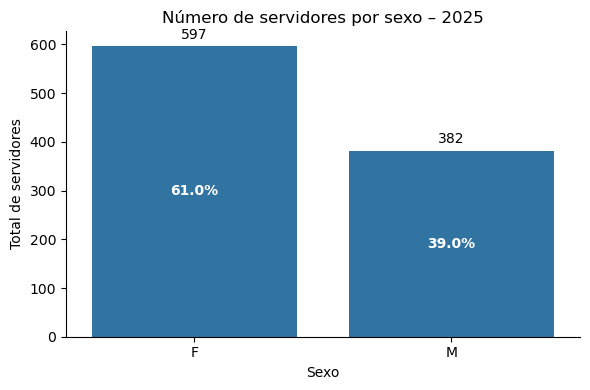

In [19]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=contagem_sexo,
    x="sexo",
    y="total_servidores"
)

# Número absoluto em cima da barra
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Percentual dentro da barra
for i, row in contagem_sexo.iterrows():
    ax.text(
        i,
        row["total_servidores"] / 2,
        f'{row["percentual"]}%',
        ha="center",
        va="center",
        color="white",
        fontweight="bold"
    )

plt.title("Número de servidores por sexo – 2025")
plt.xlabel("Sexo")
plt.ylabel("Total de servidores")

sns.despine()
plt.tight_layout()
plt.show()

- Concluímos então que 61% do quadro de servidores é do sexo Feminino e 39% do sexo Masculino.

### Desligamentos durante o ano de 2025 por sexo

In [20]:
df_deslig_2025 = df_serv[
    df_serv["data_desligamento"].notna() &
    (df_serv["data_desligamento"].dt.year == 2025)
]

In [21]:
deslig_por_sexo = (
    df_deslig_2025["sexo"]
    .value_counts()
    .loc[["F", "M"]]
    .reset_index()
)

deslig_por_sexo.columns = ["sexo", "total_desligamentos"]
deslig_por_sexo

,sexo,total_desligamentos
0,F,115
1,M,40


In [22]:
total = deslig_por_sexo["total_desligamentos"].sum()

deslig_por_sexo["percentual"] = (
    deslig_por_sexo["total_desligamentos"] / total * 100
).round(1)

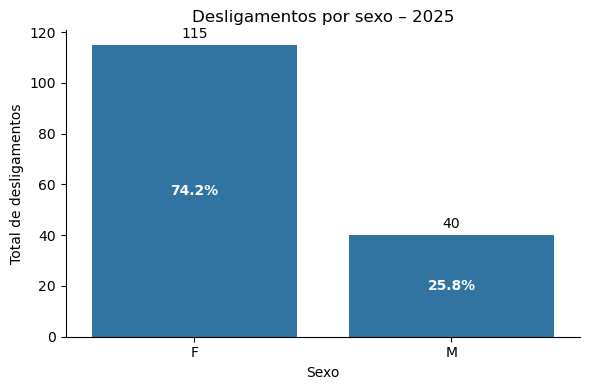

In [23]:

plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=deslig_por_sexo,
    x="sexo",
    y="total_desligamentos"
)

# Número absoluto em cima da barra
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Percentual dentro da barra
for i, row in deslig_por_sexo.iterrows():
    ax.text(
        i,
        row["total_desligamentos"] / 2,
        f'{row["percentual"]}%',
        ha="center",
        va="center",
        color="white",
        fontweight="bold"
    )

plt.title("Desligamentos por sexo – 2025")
plt.xlabel("Sexo")
plt.ylabel("Total de desligamentos")

sns.despine()
plt.tight_layout()
plt.show()

Em 2025, foram registrados 155 desligamentos, sendo 74.2% do sexo feminino e 25.8% do sexo masculino, indicando a distribuição dos desligamentos por sexo ao longo do ano.

In [24]:
df_unico = df_serv.drop_duplicates(subset="id_servidor")

total_serv_sexo = (
    df_unico.groupby("sexo")["id_servidor"].nunique()
    .loc[["F", "M"]]
    .reset_index(name="total_servidores")
)

In [25]:
taxa_deslig_sexo = total_serv_sexo.merge(
    deslig_por_sexo,
    on="sexo",
    how="left"
)

### Taxa de desligamento por sexo – 2025

A tabela apresenta a análise dos desligamentos de servidores no ano de 2025, segmentada por sexo, considerando **servidores únicos** e **eventos de desligamento**.

In [26]:
taxa_deslig_sexo["taxa_desligamento_pct"] = (
    taxa_deslig_sexo["total_desligamentos"] /
    taxa_deslig_sexo["total_servidores"] * 100
).round(2)


taxa_deslig_sexo

,sexo,total_servidores,total_desligamentos,percentual,taxa_desligamento_pct
0,F,597,115,74.20,19.26
1,M,382,40,25.80,10.47


**Definições utilizadas:**
- **Total de servidores**: quantidade de servidores distintos de cada sexo ao longo de 2025.
- **Total de desligamentos**: número de eventos de desligamento ocorridos em 2025.
- **Percentual**: participação de cada sexo no total de desligamentos.
- **Taxa de desligamento (%)**: razão entre o total de desligamentos e o total de servidores de cada sexo.

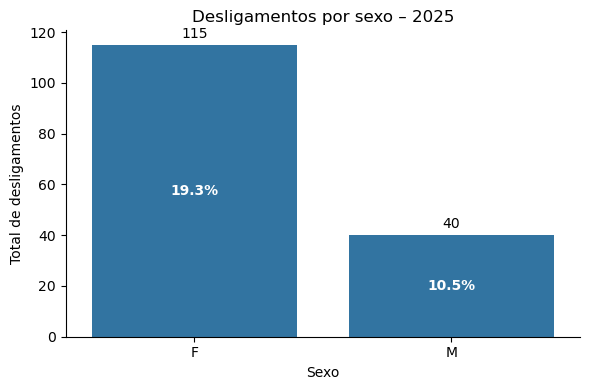

In [27]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=taxa_deslig_sexo,
    x="sexo",
    y="total_desligamentos"
)

# Número absoluto em cima da barra
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Percentual (taxa de desligamento) dentro da barra
for i, row in taxa_deslig_sexo.iterrows():
    ax.text(
        i,
        row["total_desligamentos"] / 2,
        f'{row["taxa_desligamento_pct"]:.1f}%',
        ha="center",
        va="center",
        color="white",
        fontweight="bold"
    )

plt.title("Desligamentos por sexo – 2025")
plt.xlabel("Sexo")
plt.ylabel("Total de desligamentos")

sns.despine()
plt.tight_layout()
plt.show()

#### Principais resultados

- O sexo feminino concentrou **74,2% dos desligamentos**, refletindo também sua maior presença no quadro total de servidores.
- A **taxa de desligamento entre servidoras (19,26%)** foi significativamente superior à observada entre servidores do sexo masculino (**10,47%**).
- Esse resultado indica uma **rotatividade proporcionalmente maior entre mulheres** no ano de 2025.

#### Observação metodológica
Cada servidor foi contado apenas uma vez no total de servidores, enquanto cada desligamento foi considerado como um evento individual, conforme a data efetiva de desligamento registrada nos dados.

> A análise da taxa de desligamento permite uma comparação mais justa entre os grupos, independentemente do tamanho do quadro funcional de cada sexo.


### Onde exatamente está acontecendo essa rotatividade?

### Desligamentos de servidoras por categoria de cargo – 2025

A tabela apresenta a distribuição dos desligamentos de servidoras no ano de 2025, segmentada por **categoria de cargo**, considerando cada desligamento como um evento individual.

In [28]:
mulheres_desligadas_2025 = df_serv[
    (df_serv["sexo"] == "F") &
    (df_serv["data_desligamento"].notna()) &
    (df_serv["data_desligamento"].dt.year == 2025)
]

In [29]:
deslig_cat = (
    mulheres_desligadas_2025["categoria_cargo"]
    .value_counts()
    .reset_index()
)

deslig_cat.columns = [
    "categoria_cargo",
    "total_desligamentos"
]

In [30]:
total = deslig_cat["total_desligamentos"].sum()

deslig_cat["percentual"] = (
    deslig_cat["total_desligamentos"] / total * 100
).round(2)

deslig_cat

,categoria_cargo,total_desligamentos,percentual
0,educacao,85,73.91
1,operacional,8,6.96
2,comissionado,8,6.96
3,assistencia_social,6,5.22
4,saude,6,5.22
5,administrativo,2,1.74


In [31]:
deslig_cat = deslig_cat.sort_values(
    by="total_desligamentos",
    ascending=False
)

deslig_cat

,categoria_cargo,total_desligamentos,percentual
0,educacao,85,73.91
1,operacional,8,6.96
2,comissionado,8,6.96
3,assistencia_social,6,5.22
4,saude,6,5.22
5,administrativo,2,1.74


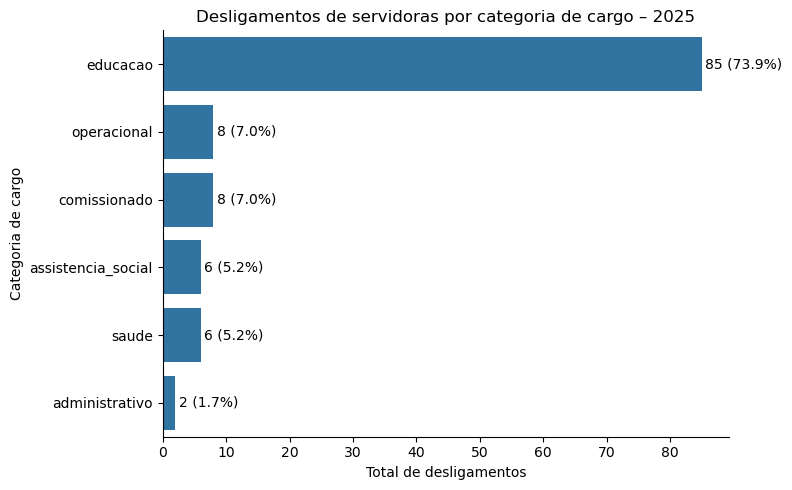

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=deslig_cat,
    y="categoria_cargo",
    x="total_desligamentos"
)

# Número absoluto + percentual no fim da barra
for i, row in deslig_cat.iterrows():
    ax.text(
        row["total_desligamentos"] + 0.5,
        i,
        f'{row["total_desligamentos"]} ({row["percentual"]:.1f}%)',
        va="center"
    )

plt.title("Desligamentos de servidoras por categoria de cargo – 2025")
plt.xlabel("Total de desligamentos")
plt.ylabel("Categoria de cargo")

sns.despine()
plt.tight_layout()
plt.show()


#### Principais resultados

- A categoria **Educação** concentra a ampla maioria dos desligamentos de servidoras, com **85 registros**, representando **73,91%** do total.
- As categorias **Operacional** e **Comissionado** aparecem em seguida, ambas com **8 desligamentos** cada (**6,96%**).
- As áreas de **Assistência Social** e **Saúde** registraram **6 desligamentos** cada, correspondendo a **5,22%** do total.
- A categoria **Administrativo** apresentou o menor volume, com **2 desligamentos** (**1,74%**).

#### Interpretação
Os resultados indicam que os desligamentos de servidoras em 2025 estiveram **fortemente concentrados na área da Educação**, sugerindo maior rotatividade ou maior volume de vínculos nessa categoria em comparação às demais. Esse padrão pode estar associado a características específicas dos cargos, como vínculos temporários, contratos por período letivo ou maior exposição a desligamentos ao longo do ano.

> **Nota metodológica:** a análise considera exclusivamente desligamentos ocorridos em 2025 e inclui apenas servidoras do sexo feminino, com base na data efetiva de desligamento registrada.


## Distribuição de Servidoras por Categoria de Cargo – 2025

In [33]:
df_fem = df_unico[df_unico["sexo"] == "F"]

In [34]:
fem_cat = (
    df_fem.groupby("categoria_cargo")["id_servidor"]
    .nunique()
    .reset_index(name="total_feminino")
    .sort_values("total_feminino", ascending=False)
)

fem_cat

,categoria_cargo,total_feminino
4,educacao,273
7,saude,122
5,operacional,87
0,administrativo,52
1,assistencia_social,34
2,comissionado,24
3,cultura,2
8,tecnico,2
6,politico,1


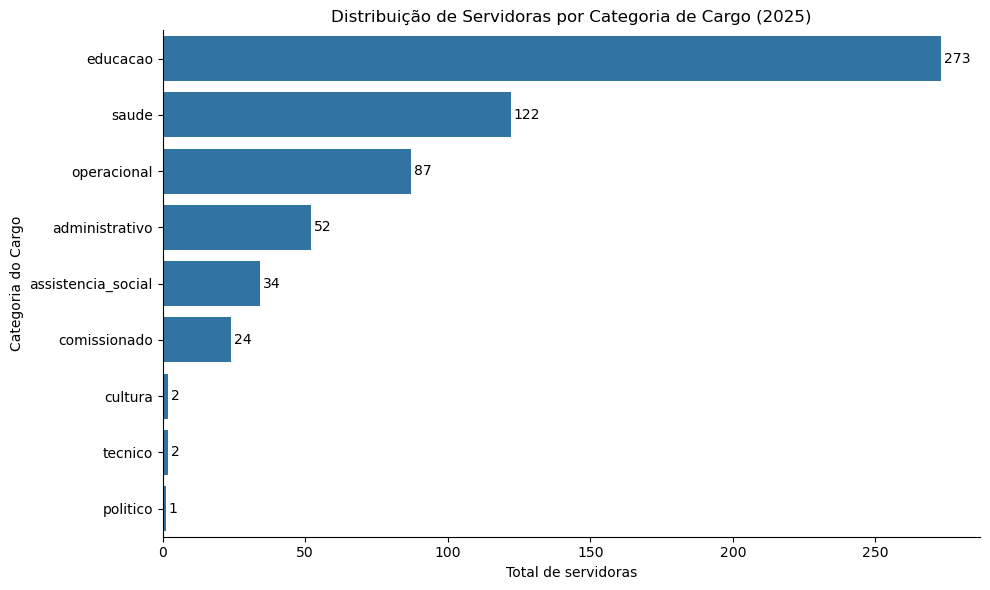

In [35]:
plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=fem_cat,
    y="categoria_cargo",
    x="total_feminino"
)

sns.despine()

for i, v in enumerate(fem_cat["total_feminino"]):
    ax.text(v + 1, i, f"{v}", va="center")


plt.title("Distribuição de Servidoras por Categoria de Cargo (2025)")
plt.xlabel("Total de servidoras")
plt.ylabel("Categoria do Cargo")

plt.tight_layout()
plt.show()

In [36]:
total_por_categoria = (
    df_unico.groupby("categoria_cargo")["id_servidor"]
    .nunique()
    .reset_index(name="total_categoria")
)

In [37]:
perfil_feminino_categoria = fem_cat.merge(
    total_por_categoria,
    on="categoria_cargo",
    how="left"
)

perfil_feminino_categoria["percentual_feminino"] = (
    perfil_feminino_categoria["total_feminino"] /
    perfil_feminino_categoria["total_categoria"] * 100
)

perfil_feminino_categoria.sort_values(
    "percentual_feminino", ascending=False
)

,categoria_cargo,total_feminino,total_categoria,percentual_feminino
6,cultura,2,2,100.00
0,educacao,273,289,94.46
4,assistencia_social,34,41,82.93
1,saude,122,177,68.93
3,administrativo,52,92,56.52
8,politico,1,2,50.00
5,comissionado,24,51,47.06
7,tecnico,2,6,33.33
2,operacional,87,318,27.36


A tabela acima apresenta a quantidade total de servidoras (sexo feminino) distribuídas por categoria de cargo no ano de 2025, considerando apenas pessoas únicas (sem duplicidade de matrícula).

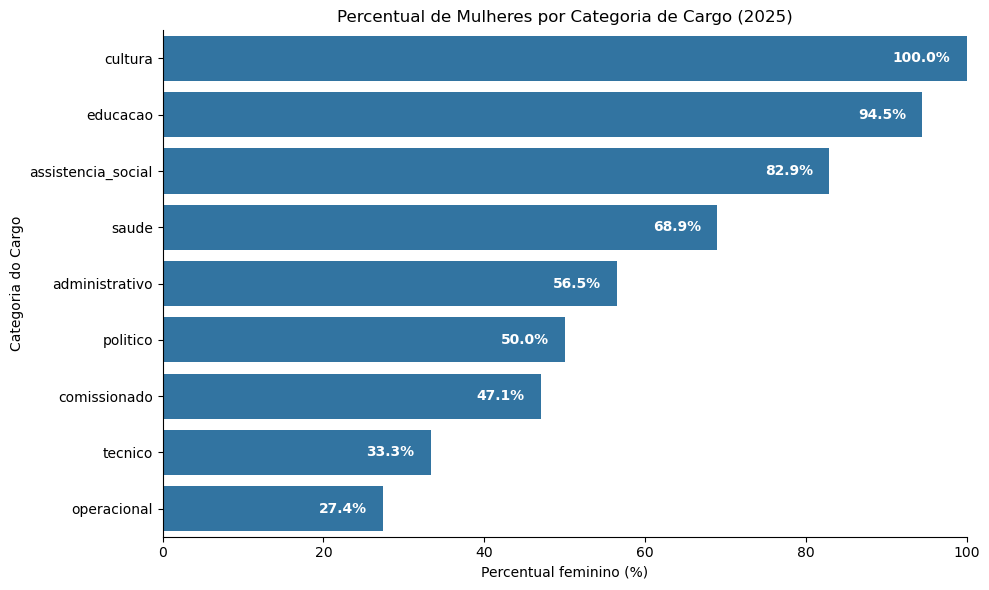

In [38]:
df_plot = perfil_feminino_categoria.sort_values(
    "percentual_feminino", ascending=False
)

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_plot,
    y="categoria_cargo",
    x="percentual_feminino"
)

sns.despine()

for i, row in df_plot.iterrows():
    ax.text(
        row["percentual_feminino"] - 2,
        list(df_plot.index).index(i),
        f"{row['percentual_feminino']:.1f}%",
        va="center",
        ha="right",
        color="white",
        fontsize=10,
        fontweight="bold"
    )

plt.title("Percentual de Mulheres por Categoria de Cargo (2025)")
plt.xlabel("Percentual feminino (%)")
plt.ylabel("Categoria do Cargo")

plt.xlim(0, 100)
plt.tight_layout()
plt.show()

Observa-se que:

- A categoria Educação concentra, de forma expressiva, o maior número de mulheres no quadro funcional, com 273 servidoras, evidenciando seu caráter predominantemente feminino.

- Em seguida, destacam-se as áreas de Saúde (122 servidoras) e Operacional (87 servidoras), que, embora relevantes em volume absoluto, apresentam perfis distintos quando analisadas proporcionalmente.

- As categorias Administrativo (52) e Assistência Social (34) ocupam posições intermediárias, indicando uma presença feminina significativa, porém mais equilibrada em relação a outros gêneros.

- Já os cargos Comissionados (24) apresentam menor concentração feminina, enquanto as categorias Cultura, Técnico e Político possuem participação feminina residual no conjunto de servidores.

### Top 10 cargos mais bem pagos ocupados por mulheres

In [39]:
df_base = df_serv.copy()

In [40]:
df_fem_salario = df_base[
    (df_base["sexo"] == "F") &
    (df_base["tipo_pagamento"] == "folha_mensal")
]

In [41]:
top_salarios_fem = (
    df_fem_salario
    .groupby("cargo")["proventos"]
    .max()
    .reset_index(name="salario_maximo")
    .sort_values("salario_maximo", ascending=False)
)

top_salarios_fem

,cargo,salario_maximo
40,MEDICO PSF,"29,462.02"
51,PROCURADOR GERAL DO MUNICIPIO.c,"24,687.05"
52,PROFESSOR,"17,408.31"
39,MEDICO PEDIATRA,"17,389.72"
0,AGENTE ADMINISTRATIVO,"17,282.07"
...,...,...
16,AUXILIAR DE FARMACIA,"2,587.06"
13,AUXILIAR DE CUIDADOR DE CRIANCA - ABRIGO INSTI...,"2,528.22"
49,ORIENTADOR SOCIAL,"2,417.56"
43,MESTRE DE MUSICA,"2,349.84"


In [42]:
top10_fem_salarios = top_salarios_fem.head(10)

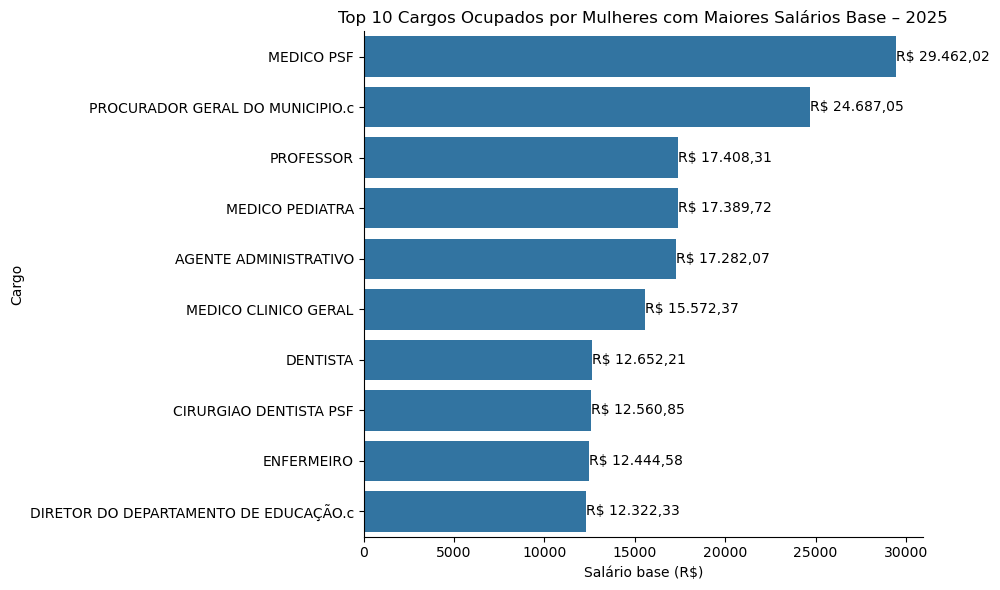

In [43]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=top10_fem_salarios,
    y="cargo",
    x="salario_maximo"
)

# remover bordas
sns.despine()

# rótulos com valor do salário
for i, v in enumerate(top10_fem_salarios["salario_maximo"]):
    ax.text(
        v,
        i,
        f"R$ {v:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
        va="center",
        ha="left",
        fontsize=10
    )

plt.title("Top 10 Cargos Ocupados por Mulheres com Maiores Salários Base – 2025")
plt.xlabel("Salário base (R$)")
plt.ylabel("Cargo")

plt.tight_layout()
plt.show()

O gráfico acima apresenta os 10 cargos ocupados por mulheres com os maiores salários base no ano de 2025, considerando exclusivamente pagamentos classificados como “Folha Mensal”, sem acúmulo de valores ao longo do ano e sem inclusão de benefícios ou proventos adicionais (como vale alimentação, gratificações ou indenizações).

- Médico PSF, que apresenta o maior salário base entre as servidoras, ultrapassando R$ 29 mil, refletindo a elevada qualificação técnica e a escassez desse profissional no serviço público.

- Procurador Geral do Município, com salário próximo a R$ 24,7 mil, valor compatível com cargos jurídicos de chefia e, em geral, pagos sob regime de subsídio.

- Professor, com salário superior a R$ 17 mil, evidenciando a existência de casos específicos no topo da carreira docente, possivelmente associados a progressões funcionais, maior carga horária ou planos de carreira consolidados.

- Outros cargos da área da saúde, como médico pediatra, médico clínico geral, dentista, cirurgião-dentista PSF e enfermeiro, que reforçam a predominância de salários mais elevados em funções técnicas especializadas.

### Top 10 cargos mais bem pagos ocupados por homens

In [44]:
df_masc_salario = df_serv[
    (df_serv["sexo"] == "M") &
    (df_serv["tipo_pagamento"] == "folha_mensal")
]

In [45]:
top_salarios_masc = (
    df_masc_salario
    .groupby("cargo")["proventos"]
    .max()
    .reset_index(name="salario_maximo")
    .sort_values("salario_maximo", ascending=False)
)

top_salarios_masc.head(10)

,cargo,salario_maximo
47,MEDICO PSF,"30,894.23"
60,PROCURADOR JURIDICO,"23,692.58"
59,PREFEITO,"20,378.73"
0,AGENTE ADMINISTRATIVO,"20,123.74"
51,MÉDICO,"19,829.51"
46,MEDICO PRONTO ATENDIMENTO,"19,504.00"
23,DIRETOR DO DEPARTAMENTO DE AGRICULTURA E MEIO ...,"17,189.68"
52,OFICIAL ADMINISTRATIVO,"15,898.37"
42,MEDICO CLINICO GERAL,"15,808.25"
30,ENCANADOR,"15,801.64"


In [46]:
top10_masc_salario = top_salarios_masc.head(10)

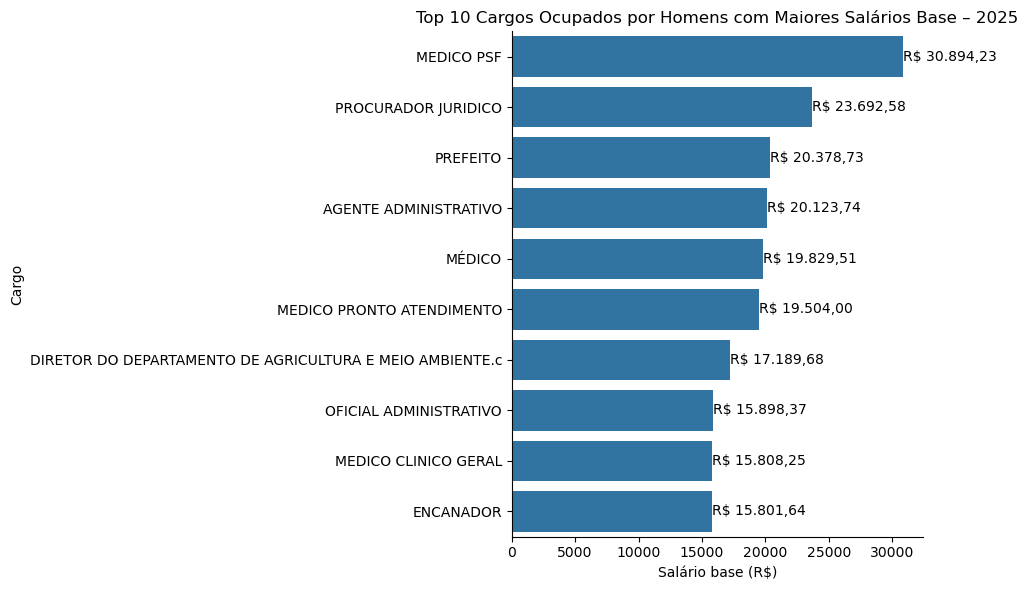

In [47]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=top10_masc_salario,
    y="cargo",
    x="salario_maximo"
)

# remover bordas
sns.despine()

# rótulos com valor do salário
for i, v in enumerate(top10_masc_salario["salario_maximo"]):
    ax.text(
        v,
        i,
        f"R$ {v:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
        va="center",
        ha="left",
        fontsize=10
    )

plt.title("Top 10 Cargos Ocupados por Homens com Maiores Salários Base – 2025")
plt.xlabel("Salário base (R$)")
plt.ylabel("Cargo")

plt.tight_layout()
plt.show()

In [48]:
top10_fem = top_salarios_fem.head(10).copy()
top10_fem["sexo"] = "F"

top10_masc = top_salarios_masc.head(10).copy()
top10_masc["sexo"] = "M"

df_comparativo = pd.concat([top10_fem, top10_masc])

### Comparação salarial dos 10 cargos mais bem pagos em 2025 por gênero

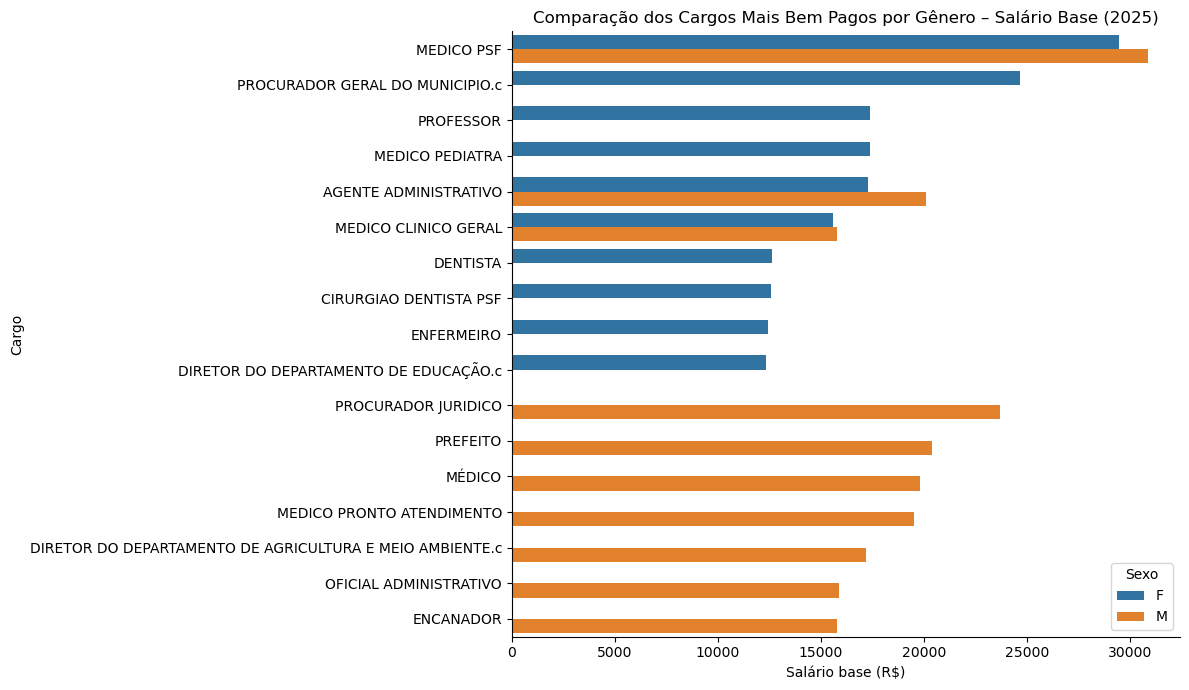

In [49]:
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=df_comparativo,
    x="salario_maximo",
    y="cargo",
    hue="sexo"
)

sns.despine()

plt.title("Comparação dos Cargos Mais Bem Pagos por Gênero – Salário Base (2025)")
plt.xlabel("Salário base (R$)")
plt.ylabel("Cargo")

plt.legend(title="Sexo")

plt.tight_layout()
plt.show()


### Distribuição salarial

In [50]:
df_salario = df_serv[
    df_serv["tipo_pagamento"] == "folha_mensal"
].copy()

df_salario = df_salario.drop_duplicates(subset="id_servidor")

df_salario.describe()

,proventos,descontos,liquido,carga_horaria_semanal,data_admissao,data_desligamento
count,963.00,970.00,970.00,970.00,970,0
mean,"4,295.23",915.34,"3,348.89",35.36,2013-12-25 14:26:58.144329984,NaT
min,674.56,0.00,0.00,6.00,1979-05-01 00:00:00,NaT
25%,"2,623.84",327.38,"2,067.95",30.00,2006-02-13 00:00:00,NaT
50%,"3,574.50",605.70,"3,008.40",40.00,2017-02-01 00:00:00,NaT
75%,"4,892.28","1,110.69","3,918.04",40.00,2023-12-04 00:00:00,NaT
max,"29,462.02","8,976.46","22,566.04",44.00,2025-12-01 00:00:00,NaT
std,"2,799.10",937.68,"2,067.97",7.57,NaN,NaN


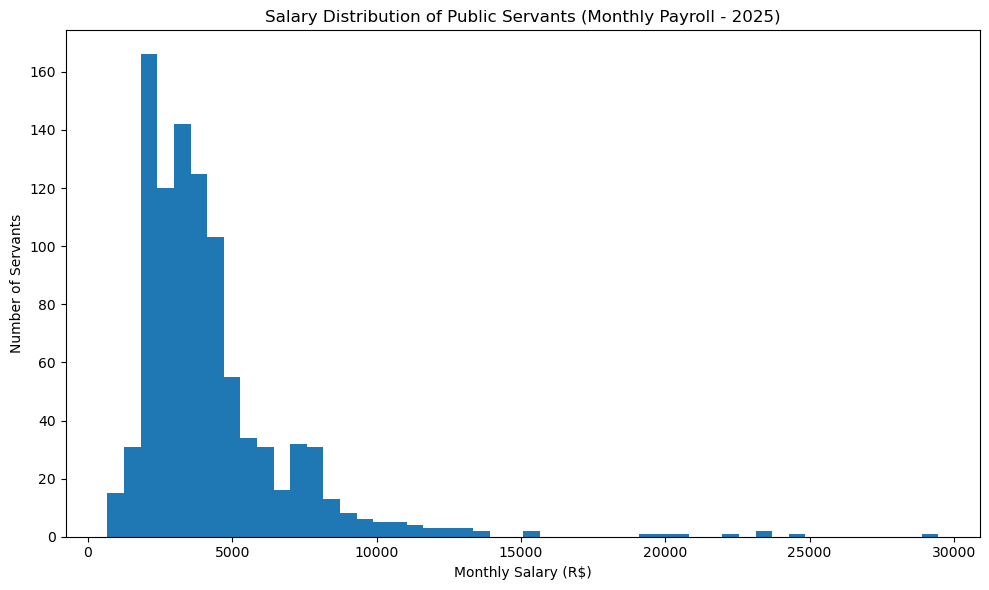

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(df_salario["proventos"], bins=50)
plt.title("Salary Distribution of Public Servants (Monthly Payroll - 2025)")
plt.xlabel("Monthly Salary (R$)")
plt.ylabel("Number of Servants")
plt.tight_layout()
plt.show()

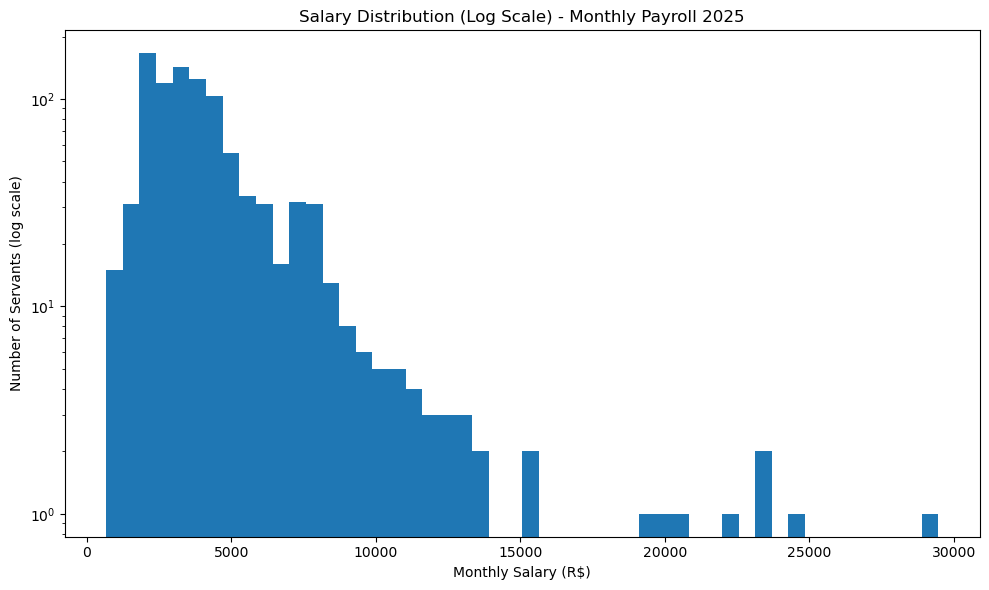

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(df_salario["proventos"], bins=50)
plt.yscale("log")
plt.title("Salary Distribution (Log Scale) - Monthly Payroll 2025")
plt.xlabel("Monthly Salary (R$)")
plt.ylabel("Number of Servants (log scale)")
plt.tight_layout()
plt.show()


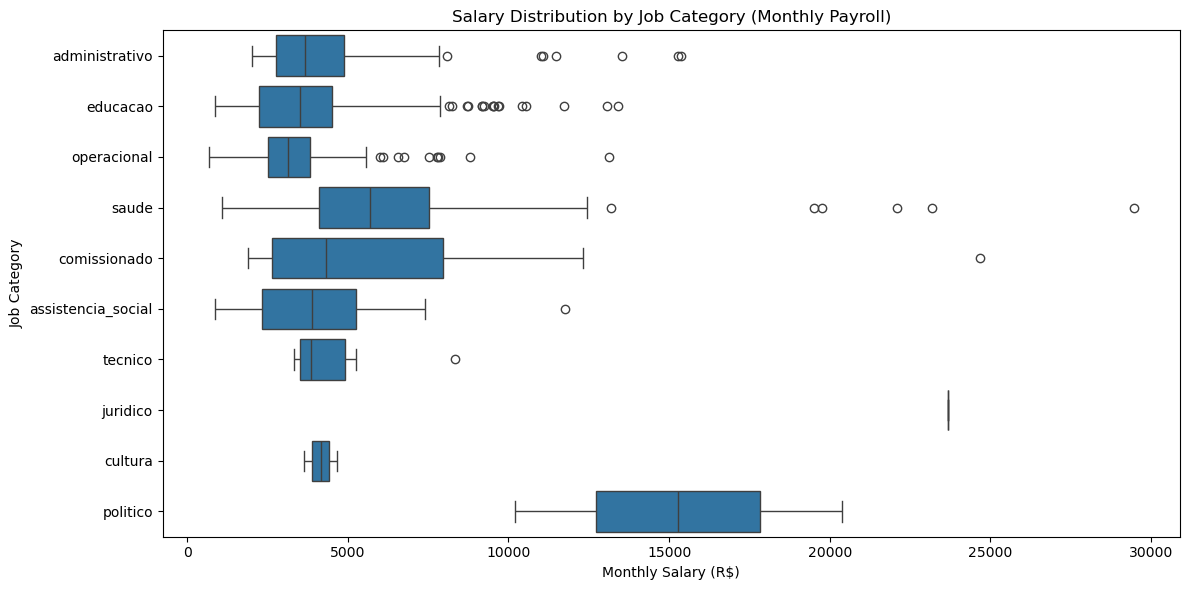

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_salario,
    y="categoria_cargo",
    x="proventos"
)
plt.title("Salary Distribution by Job Category (Monthly Payroll)")
plt.xlabel("Monthly Salary (R$)")
plt.ylabel("Job Category")
plt.tight_layout()
plt.show()

Os maiores salários concentram-se em:

- cargos políticos

- jurídico

- saúde

Valores elevados entre professores existem, mas são estatisticamente raros

A mediana salarial da educação permanece alinhada à maioria dos servidores

## Custo Total Anual da Folha por Categoria de Cargo

In [54]:
df_folha = df_serv[
    df_serv["tipo_pagamento"] == "folha_mensal"
].copy()

A tabela apresenta o **custo total anual da folha de pagamento** por categoria de cargo, considerando exclusivamente os pagamentos classificados como **folha_mensal** (salário base) ao longo de 2025.

In [55]:
custo_categoria_anual = (
    df_folha.groupby("categoria_cargo")["proventos"]
    .sum()
    .reset_index(name="custo_folha_anual")
    .sort_values("custo_folha_anual", ascending=False)
    .reset_index(drop=True)
)

custo_categoria_anual

,categoria_cargo,custo_folha_anual
0,educacao,"13,911,605.54"
1,saude,"13,047,910.13"
2,operacional,"11,835,837.85"
3,administrativo,"4,701,845.75"
4,comissionado,"2,954,973.81"
5,assistencia_social,"1,773,239.78"
6,politico,"366,817.08"
7,tecnico,"301,834.85"
8,juridico,"157,583.39"
9,cultura,"96,203.25"


O gráfico a seguir apresenta o ranking do custo total anual da folha de pagamento por categoria de cargo.

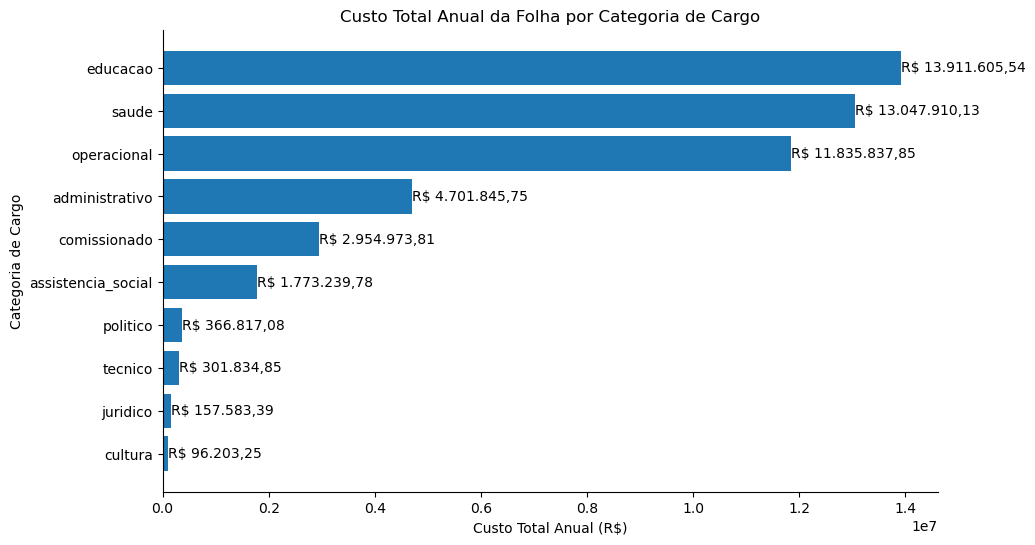

In [56]:
plt.figure(figsize=(10, 6))

bars = plt.barh(
    custo_categoria_anual["categoria_cargo"],
    custo_categoria_anual["custo_folha_anual"]
)

plt.gca().invert_yaxis()
plt.xlabel("Custo Total Anual (R$)")
plt.ylabel("Categoria de Cargo")
plt.title("Custo Total Anual da Folha por Categoria de Cargo")

ax = plt.gca()
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Rótulos formatados em padrão brasileiro
for bar in bars:
    valor = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2

    valor_formatado = (
        f"R$ {valor:,.2f}"
        .replace(",", "X")
        .replace(".", ",")
        .replace("X", ".")
    )

    plt.text(
        valor,
        y,
        valor_formatado,
        va="center",
        ha="left"
    )

plt.show()


## Custo Mensal da Folha Salarial com Salário Base

A tabela e o gráfico apresentados representam o custo mensal da folha salarial ao longo de 2025, considerando exclusivamente o salário base (folha_mensal), sem incluir benefícios, 13º salário, rescisões ou pagamentos extraordinários.

In [77]:
custo_mes = (
    df_serv
    .query("tipo_pagamento == 'folha_mensal'")
    .groupby("mes")["proventos"]
    .sum()
    .reset_index(name="custo_folha_mensal")
)

custo_mes

C:\Users\gdena\AppData\Local\Temp\ipykernel_12592\199051697.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("mes")["proventos"]


,mes,custo_folha_mensal
0,jan,"3,822,567.50"
1,fev,"4,082,414.71"
2,mar,"4,148,273.69"
3,abr,"4,242,565.38"
4,mai,"4,174,151.48"
5,jun,"4,278,082.73"
6,jul,"4,071,236.53"
7,ago,"3,977,830.28"
8,set,"4,078,992.74"
9,out,"4,098,192.30"


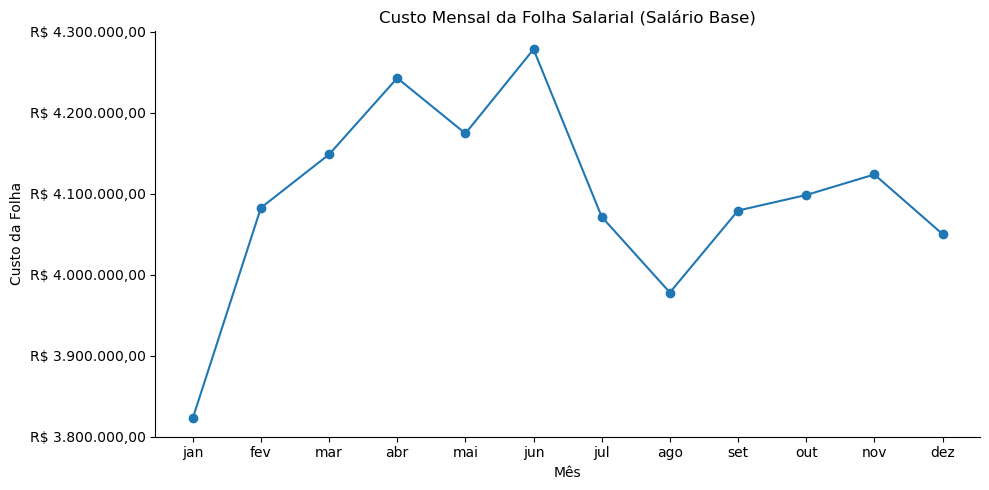

In [79]:
# formatador padrão brasileiro
def formato_brl(x, pos):
    return f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    custo_mes["mes"],
    custo_mes["custo_folha_mensal"],
    marker="o"
)

ax.yaxis.set_major_formatter(FuncFormatter(formato_brl))

ax.set_title("Custo Mensal da Folha Salarial (Salário Base)", fontsize=12)
ax.set_xlabel("Mês")
ax.set_ylabel("Custo da Folha")

# remove linhas desnecessárias
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

- O custo mensal da folha apresenta relativa estabilidade ao longo do ano, variando entre aproximadamente R$ 3,82 milhões (jan) e R$ 4,28 milhões (jun).

- Observa-se um crescimento gradual do custo entre janeiro e junho, com pico em junho, possivelmente associado a:

    - reajustes salariais,

    - progressões funcionais,

    - ou aumento temporário do quadro de servidores.

- Após o pico em junho, há uma leve retração em julho e agosto, seguida por uma estabilização entre setembro e novembro.

- O mês de dezembro apresenta pequena redução em relação a novembro, o que é coerente ao se analisar apenas o salário base, uma vez que pagamentos como 13º salário não estão incluídos nesta análise.

## Custo anual de 2025

A análise a seguir busca identificar o custo total da prefeitura, contando todos os tipos de pagamentos.

In [92]:
gasto_por_tipo = (
    df_serv.groupby("tipo_pagamento")["proventos"]
    .sum()
    .reset_index(name="custo_total")
    .sort_values("custo_total", ascending=False)
)

gasto_por_tipo

,tipo_pagamento,custo_total
3,folha_mensal,"49,147,851.43"
5,vale_alimentacao,"11,054,312.24"
1,fechamento_13_salario,"3,679,897.84"
4,rescisao,"1,665,228.68"
0,adiantamento_13_salario,"1,574,564.20"
2,folha_complementar_com_encargos,"107,209.73"


In [91]:
gasto_total_2025 = df_serv["proventos"].sum()
gasto_total_2025_formatado = f"R$ {gasto_total_2025:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
gasto_total_2025_formatado

'R$ 67.229.064,12'

O custo total do ano de 2025 foi de **R$ 67.229.064,12**.